# DAAD_ML_LAB_4_Anastasiia Matychenko

# Завантажання бібліотек

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score

# Завантаження даних з файлу "data_lab4.xlsx" з обраного листа

In [28]:
data = pd.read_excel('data_lab4.xlsx', sheet_name='1')
data = data.drop('Внутричерепное давление', axis=1)
data.head()


,t36,t35,t34,t33,t32
0,37,35,33,28,26
1,38,33,30,28,25
2,33,34,30,31,29
3,45,30,27,28,19
4,36,31,29,27,25


# Підготовка даних для кластеризації

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Побудова графіку паралельних координат для аналізу однорідності даних або виділення кластерів

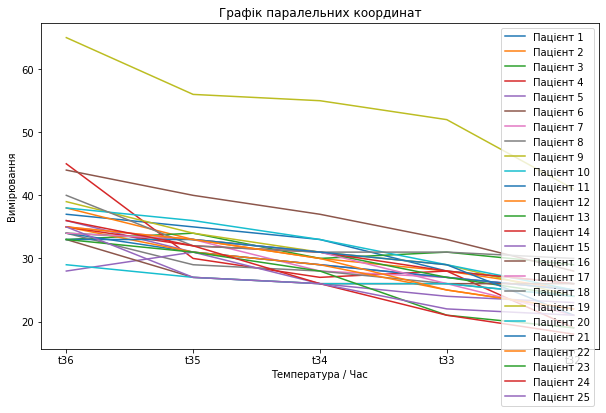

In [30]:
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.plot(data.columns, data.iloc[i], label="Пацієнт {}".format(i + 1))
plt.xlabel("Температура / Час")
plt.ylabel("Вимірювання")
plt.title("Графік паралельних координат")
plt.legend(loc='upper right')
plt.savefig('asserts/графік_паралельних_координат.png')
plt.show()

# K-means з різними кількостями кластерів та випадковими початковими центрами класів

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


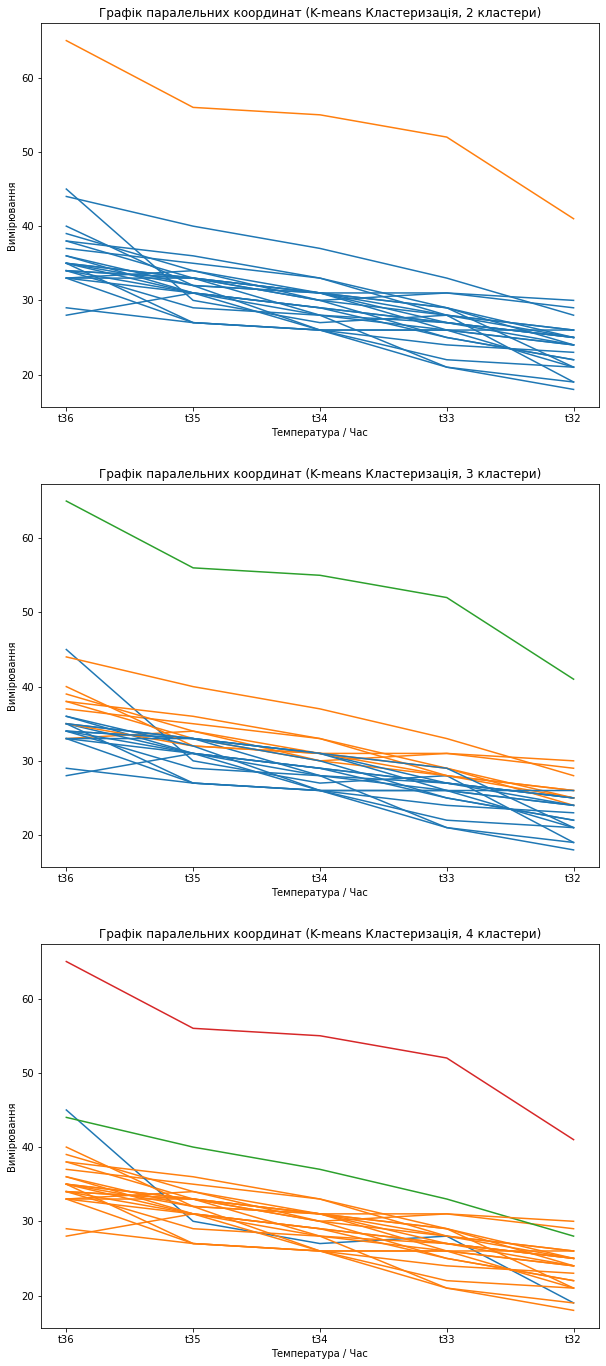

In [31]:
num_clusters_list = [2, 3, 4]
initial_centers_list = []

fig, axs = plt.subplots(len(num_clusters_list), 1, figsize=(10, 8 * len(num_clusters_list)))

for i, num_clusters in enumerate(num_clusters_list):
    initial_centers = np.random.rand(num_clusters, data.shape[1])
    initial_centers_list.append(initial_centers)

    kmeans = KMeans(n_clusters=num_clusters, init=initial_centers, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)

    # Візуалізація результатів K-means
    axs[i].set_title("Графік паралельних координат (K-means Кластеризація, {} кластери)".format(num_clusters))
    for j, label in enumerate(kmeans_labels):
        axs[i].plot(data.columns, data.iloc[j], label="Пацієнт {}".format(j + 1), color=plt.cm.tab10(label))
    axs[i].set_xlabel("Температура / Час")
    axs[i].set_ylabel("Вимірювання")

plt.savefig('asserts/kmeans_кластеризація.png')
plt.show()

# Agglomerative Clustering з різними методами

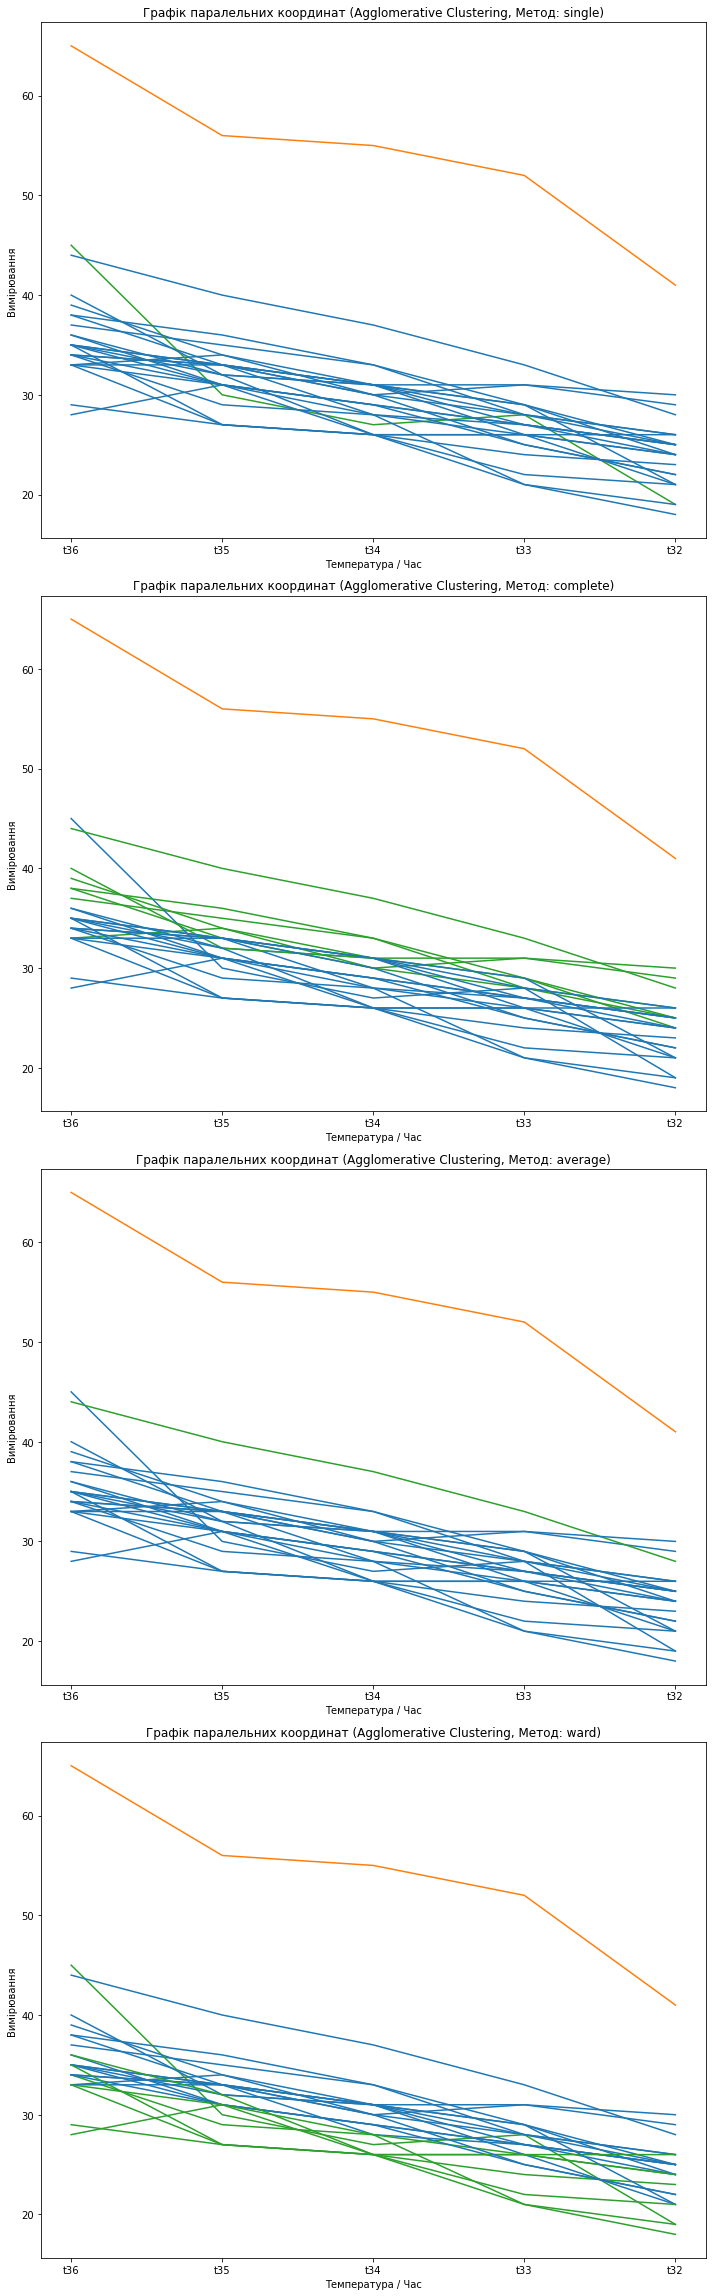

In [32]:
methods = ['single', 'complete', 'average', 'ward']

plt.figure(figsize=(10, 8 * len(methods)))

for i, method in enumerate(methods):
    agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    agg_labels = agg_clustering.fit_predict(scaled_data)

    # Візуалізація результатів Agglomerative Clustering на графіку паралельних координат
    plt.subplot(len(methods), 1, i + 1)
    plt.title("Графік паралельних координат (Agglomerative Clustering, Метод: {})".format(method))
    for j, label in enumerate(agg_labels):
        plt.plot(data.columns, data.iloc[j], label="Пацієнт {}".format(j + 1), color=plt.cm.tab10(label))
    plt.xlabel("Температура / Час")
    plt.ylabel("Вимірювання")

plt.tight_layout()
plt.savefig('asserts/agglomerative_clustering.png')
plt.show()

# Оцінка оптимальної кількості кластерів за допомогою індексів якості кластеризації

In [33]:
k_values = range(2, 10)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_scores.append(metrics.silhouette_score(scaled_data, labels))
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(scaled_data, labels))
    davies_bouldin_scores.append(metrics.davies_bouldin_score(scaled_data, labels))

# Візуалізація результатів оцінки якості кластеризації

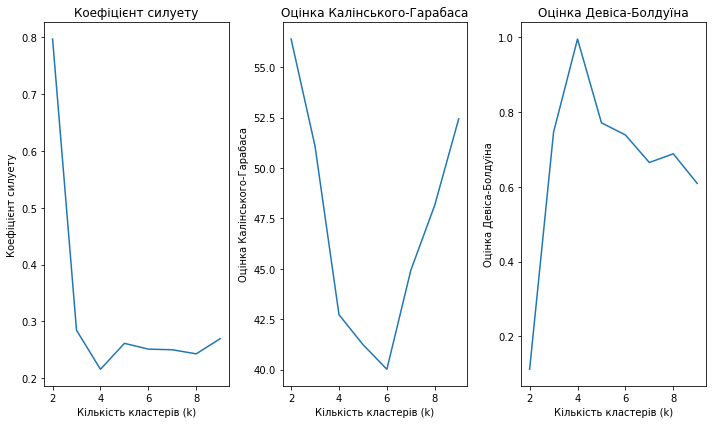

In [34]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, label='Коефіцієнт силуету')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Коефіцієнт силуету')
plt.title('Коефіцієнт силуету')

plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, label='Оцінка Калінського-Гарабаса')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Оцінка Калінського-Гарабаса')
plt.title('Оцінка Калінського-Гарабаса')

plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, label='Оцінка Девіса-Болдуїна')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Оцінка Девіса-Болдуїна')
plt.title('Оцінка Девіса-Болдуїна')

plt.tight_layout()
plt.savefig('asserts/оцінка_якості_кластеризації.png')
plt.show()

# Порівняння розбиття за допомогою "ручного" співставлення кластерів та індексу Rand

In [35]:
manual_labels = [0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2]
kmeans_rand_score = adjusted_rand_score(manual_labels, kmeans_labels)
agg_rand_score = adjusted_rand_score(manual_labels, agg_labels)

print("Індекс Rand для K-means:", kmeans_rand_score)
print("Індекс Rand для Agglomerative Clustering:", agg_rand_score)

Індекс Rand для K-means: -0.009265387160820648
Індекс Rand для Agglomerative Clustering: 0.048427448177269475
